# Introduction

### Business Problem:

HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources has been using analytics for years. However, the collection, processing and analysis of data has been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game. Here is an opportunity to try predictive analytics in identifying the employees most likely to get promoted.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
import os
os.chdir("C:\\Users\\Dell\\Downloads")

In [3]:
df = pd.read_csv("train_LZdllcl.csv")

In [4]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
# To know the no of rows and columns
df.shape

(54808, 14)

In [7]:
# checking the missing values
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

#### points to remeber

1) There are 2409 missing values in education and 4124 in previous_year_rating

2) As this is a classification problem we often have to deal with imbalanced data lets us checked our target varibale distribution

In [8]:
# checking for imbalanced data
print(df.is_promoted.value_counts())

0    50140
1     4668
Name: is_promoted, dtype: int64


# EDA

we will start exploring the data to get better insights

In [9]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

There are 5 categorical variables and rest are numerical 

In [10]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Text(0.5, 0, 'length_of_service')

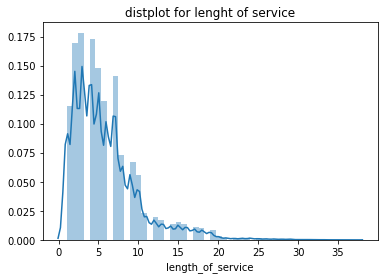

In [17]:
a=sns.distplot(df["length_of_service"])
a.set_title("distplot for lenght of service")
a.set_xlabel('length_of_service')

Text(0.5, 0, 'avg_training_score')

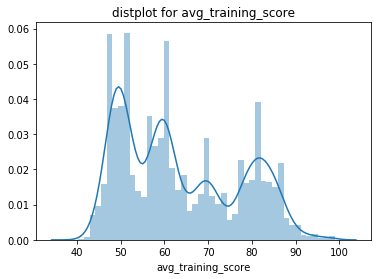

In [18]:
a=sns.distplot(df["avg_training_score"])
a.set_title("distplot for avg_training_score")
a.set_xlabel('avg_training_score')

In [21]:
# checking for the promoted and non promoted people for this avg_triaing_score
av = df[df["is_promoted"]==0]
av1= df[df["is_promoted"]==1]


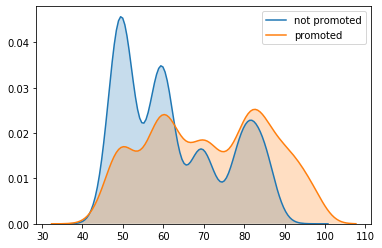

In [25]:
sns.kdeplot(av['avg_training_score'],label='not promoted',shade=True)
sns.kdeplot(av1['avg_training_score'],label = 'promoted',shade=True);

-> Here we can clearly see from the above histogram people who are having more average training score are more likely to get promoted. so, this might be a very good variable in predicting the target so we try to do feature engineering on this variable and try to get more insights

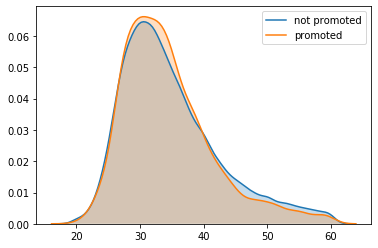

In [26]:
# checking for age variable 
sns.kdeplot(av['age'],label='not promoted',shade=True)
sns.kdeplot(av1['age'],label = 'promoted',shade=True);

-> Age variable might not be an useful factor because we can see that there is no difference between promoted and non_promoted distributions 

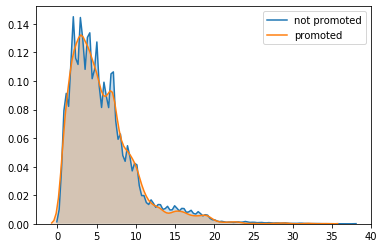

In [27]:
sns.kdeplot(av['length_of_service'],label='not promoted',shade=True)
sns.kdeplot(av1['length_of_service'],label = 'promoted',shade=True);

-> Length_of_service also doesn't make much difference 

In [ ]:
### categorical variables


In [11]:
df.department.value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [13]:
df.gender.value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [14]:
df.recruitment_channel.value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

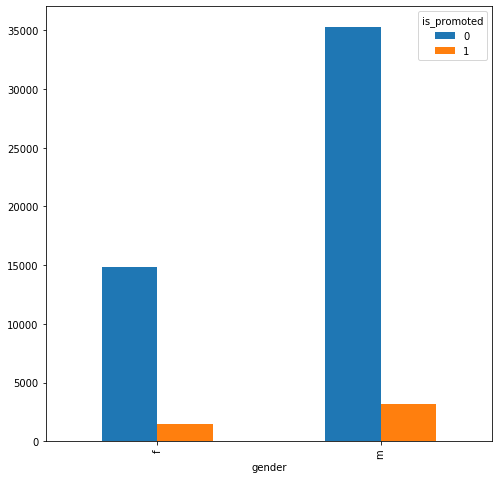

In [7]:
gender = pd.crosstab(index=df["gender"], 
                          columns=df["is_promoted"])
gender.plot(kind="bar", figsize=(8,8),stacked=False)

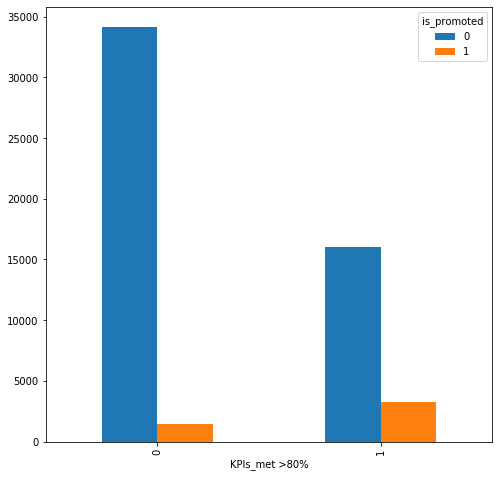

In [8]:
b = pd.crosstab(index=df["KPIs_met >80%"], 
                          columns=df["is_promoted"])
b.plot(kind="bar", figsize=(8,8),stacked=False)

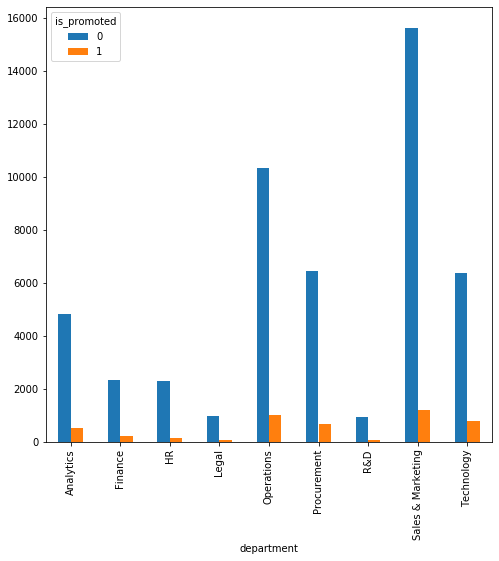

In [9]:
c = pd.crosstab(index=df["department"], 
                          columns=df["is_promoted"])
c.plot(kind="bar", figsize=(8,8),stacked=False)

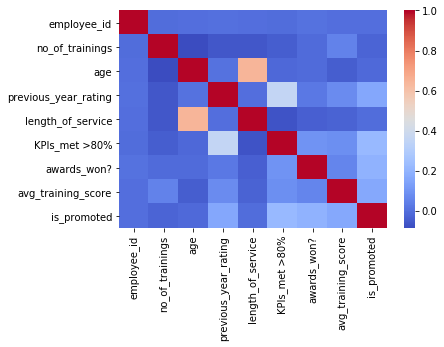

In [16]:
sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')

1)  From the above heatmap we can see a better correlation between for the variables avg_training_score, awards won and KPIs_met>80% are more and better with is_promoted(target variable).so, these might be good preicitors. 

2)people having KPI >80 having higher chance of getting promoted

3)previous year rating has also plays a important factor in deciding promoted or not

4)people getting good training_score also have a better chacnce of getting promoted.

5) Also note that we have missing values we need to deal with missing values before moving to the missing values

In [18]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

# Model Building

### Basic model

Before building any model first we impute our missing values in very basic format with mode

In [22]:
import statistics as sts
print(sts.mode(df["education"]))

Bachelor's


In [23]:
print(sts.mode(df["previous_year_rating"]))

3.0


In [26]:
df["education"].fillna("Bachelor's", inplace=True)

In [29]:
df["previous_year_rating"].fillna(3,inplace=True)

In [30]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [31]:
# now lets divide our data into train and test 
df= pd.get_dummies(df, columns=['department','region','education','gender','recruitment_channel'])

In [32]:
df.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,1,0,49,0,0,...,0,0,0,0,1,1,0,0,0,1
1,65141,1,30,5.0,4,0,0,60,0,0,...,0,0,1,0,0,0,1,1,0,0
2,7513,1,34,3.0,7,0,0,50,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2542,2,39,1.0,10,0,0,50,0,0,...,0,0,1,0,0,0,1,1,0,0
4,48945,1,45,3.0,2,0,0,73,0,0,...,0,0,1,0,0,0,1,1,0,0


In [33]:
#dividing the target and input variables
x= df.drop(columns=['is_promoted'],axis=1) 
y=df["is_promoted"]

In [34]:
# spliting the train and test using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    stratify=y, 
                                                    test_size=0.25)

In [35]:
X_train.shape

(41106, 59)

In [36]:
X_test.shape

(13702, 59)

In [37]:
# fitting a basic decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [38]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [39]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8995037220843672


In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11808   727]
 [  650   517]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     12535
           1       0.42      0.44      0.43      1167

    accuracy                           0.90     13702
   macro avg       0.68      0.69      0.69     13702
weighted avg       0.90      0.90      0.90     13702



-> Although our accuracy is good but the data is imbalanced so we go with f1 score and auc curve

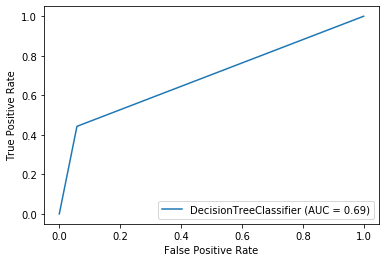

In [58]:
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
clf_disp = plot_roc_curve(clf, X_test, y_test, ax=ax)
plt.show()

-> we can improve the area under curve by selecting some better models and also with better way of imputing missing values

### Improved Model

-> Now we try to drop some of the unimportant variables to improve our accuracy

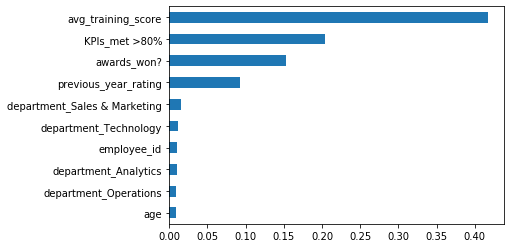

In [44]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(x, y)
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=x.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [92]:
data = pd.read_csv("train_LZdllcl.csv")

In [93]:
# dropping some unimportant variables to improve accuracy
data = data.drop(columns=["recruitment_channel","region"],axis=1)

In [94]:
len(data.columns)

12

#### Missing values with Decision Tree

In [95]:
data["education"].fillna("Bachelor's", inplace=True)

In [96]:
data = pd.get_dummies(data, columns=['department','education','gender'])

In [97]:
defa = data.copy()

In [98]:
defa.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m
0,65438,1,35,5.0,8,1,0,49,0,0,...,0,0,0,1,0,0,0,1,1,0
1,65141,1,30,5.0,4,0,0,60,0,0,...,1,0,0,0,0,1,0,0,0,1
2,7513,1,34,3.0,7,0,0,50,0,0,...,0,0,0,1,0,1,0,0,0,1
3,2542,2,39,1.0,10,0,0,50,0,0,...,0,0,0,1,0,1,0,0,0,1
4,48945,1,45,3.0,2,0,0,73,0,0,...,0,0,0,0,1,1,0,0,0,1


In [99]:
# saving the indexes of all the missing values for previous_year_rating
mis=defa[defa.isnull().any(axis=1)].index

In [101]:
mis

Int64Index([   10,    23,    29,    56,    58,    62,    66,    67,    84,
               89,
            ...
            54659, 54666, 54683, 54690, 54700, 54703, 54734, 54746, 54773,
            54801],
           dtype='int64', length=4124)

In [102]:
# creating our test data to impute the missing values through decision tree for previous_year_rating
mis_test=defa.iloc[mis,:]
mis_test.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m
10,29934,1,30,NaN,1,0,0,77,0,0,...,0,0,0,0,1,1,0,0,0,1
23,71177,1,27,NaN,1,0,0,70,0,0,...,0,1,0,0,0,1,0,0,0,1
29,74759,1,26,NaN,1,0,0,44,0,0,...,0,0,0,1,0,1,0,0,0,1
56,45709,1,29,NaN,1,0,0,49,0,0,...,0,0,0,1,0,1,0,0,1,0
58,26599,2,27,NaN,1,1,0,47,0,0,...,0,0,0,1,0,1,0,0,0,1


In [103]:
# creating our training data who doesn't have the missing values for previous_year_rating
mis_train=defa[~defa['previous_year_rating'].isnull()]
mis_train.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,...,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m
0,65438,1,35,5.0,8,1,0,49,0,0,...,0,0,0,1,0,0,0,1,1,0
1,65141,1,30,5.0,4,0,0,60,0,0,...,1,0,0,0,0,1,0,0,0,1
2,7513,1,34,3.0,7,0,0,50,0,0,...,0,0,0,1,0,1,0,0,0,1
3,2542,2,39,1.0,10,0,0,50,0,0,...,0,0,0,1,0,1,0,0,0,1
4,48945,1,45,3.0,2,0,0,73,0,0,...,0,0,0,0,1,1,0,0,0,1


In [104]:
# dividing the target variable as previous_year_Rating to predict the missing values
x_train = mis_train.drop(columns=["previous_year_rating"])

In [105]:
x_train.shape

(50684, 22)

In [106]:
y_train = mis_train["previous_year_rating"]

In [107]:
# dividing the target for mis_test dataset
x_test = mis_test.drop(columns=["previous_year_rating"])

In [108]:
x_test.shape

(4124, 22)

In [109]:
#fitting a decision tree for missing values
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [110]:
y_pred

array([3., 4., 4., ..., 5., 4., 3.])

In [111]:
x_test["previous_year_rating"] = y_pred

In [112]:
x_test.shape

(4124, 23)

In [113]:
# concating the predicted values to the dataset
new_data1 = pd.concat([mis_train,x_test])

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [114]:
new_data1.shape

(54808, 23)

In [115]:
data.shape

(54808, 23)

In [116]:
new_data1.head()

,KPIs_met >80%,age,avg_training_score,awards_won?,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,...,education_Bachelor's,education_Below Secondary,education_Master's & above,employee_id,gender_f,gender_m,is_promoted,length_of_service,no_of_trainings,previous_year_rating
0,1,35,49,0,0,0,0,0,0,0,...,0,0,1,65438,1,0,0,8,1,5.0
1,0,30,60,0,0,0,0,0,1,0,...,1,0,0,65141,0,1,0,4,1,5.0
2,0,34,50,0,0,0,0,0,0,0,...,1,0,0,7513,0,1,0,7,1,3.0
3,0,39,50,0,0,0,0,0,0,0,...,1,0,0,2542,0,1,0,10,2,1.0
4,0,45,73,0,0,0,0,0,0,0,...,1,0,0,48945,0,1,0,2,1,3.0


1) we use this dataset to see the results 

2) Note that we need to do the same procedure for the test dataset as well to impute the missing values

In [117]:
new_data1.to_csv('C:\\Users\\Dell\\Downloads\\HR analytics.csv')

In [119]:
ub = pd.read_csv("HR analytics_train.csv")

In [120]:
ub.head()

,employee_id,KPIs_met >80%,age,avg_training_score,awards_won?,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,...,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,length_of_service,no_of_trainings,previous_year_rating,is_promoted
0,65438,1,35,49,0,0,0,0,0,0,...,0,0,0,1,1,0,8,1,5,0
1,65141,0,30,60,0,0,0,0,0,1,...,0,1,0,0,0,1,4,1,5,0
2,7513,0,34,50,0,0,0,0,0,0,...,0,1,0,0,0,1,7,1,3,0
3,2542,0,39,50,0,0,0,0,0,0,...,0,1,0,0,0,1,10,2,1,0
4,48945,0,45,73,0,0,0,0,0,0,...,1,1,0,0,0,1,2,1,3,0


#### Decision Tree

In [122]:
#dividing the target and input variables
x= ub.drop(columns=['is_promoted'],axis=1) 
y=ub["is_promoted"]

In [123]:
# spliting the train and test using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    stratify=y, 
                                                    test_size=0.25)

In [124]:
clf23 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf23 = clf23.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf23.predict(X_test)

In [125]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8980440811560356


In [126]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11758   777]
 [  620   547]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     12535
           1       0.41      0.47      0.44      1167

    accuracy                           0.90     13702
   macro avg       0.68      0.70      0.69     13702
weighted avg       0.90      0.90      0.90     13702



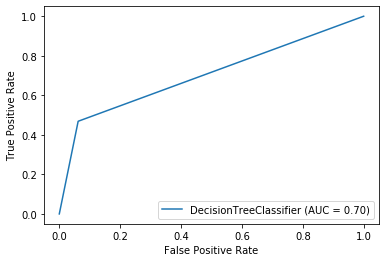

In [127]:
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
clf_disp = plot_roc_curve(clf23, X_test, y_test, ax=ax)
plt.show()

-> From this model we got a bit better results when compared to normal decision tree. so, here missing values imputation does not help up to greater extent

#### Random Forest

In [128]:
# building random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [129]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [130]:
predict = rfc.predict(X_test)

In [133]:
print("Accuracy:",metrics.accuracy_score(y_test, predict))

Accuracy: 0.9397898117063203


In [142]:
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

[[12473    62]
 [  763   404]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12535
           1       0.87      0.35      0.49      1167

    accuracy                           0.94     13702
   macro avg       0.90      0.67      0.73     13702
weighted avg       0.94      0.94      0.93     13702



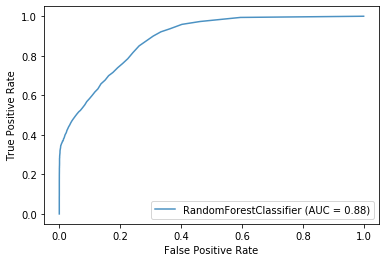

In [135]:
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

-> From this model, Random Forest we got very good f1 score and AUC is also good when compared to all other previous models

#### Adaboost Classifier

In [137]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics


In [138]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
model = abc.fit(X_train, y_train)

In [140]:
predic = model.predict(X_test)

In [141]:
print("Accuracy:",metrics.accuracy_score(y_test, predic))

Accuracy: 0.9240986717267552


In [143]:
print(confusion_matrix(y_test, predic))
print(classification_report(y_test, predic))

[[12444    91]
 [  949   218]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     12535
           1       0.71      0.19      0.30      1167

    accuracy                           0.92     13702
   macro avg       0.82      0.59      0.63     13702
weighted avg       0.91      0.92      0.90     13702



# Final Model

In [2]:
import os
os.chdir("C:\\Users\\Dell\\Downloads")

In [16]:
df = pd.read_csv("HR analytics_train.csv")

In [17]:
df.head()

,employee_id,KPIs_met >80%,age,avg_training_score,awards_won?,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,...,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,length_of_service,no_of_trainings,previous_year_rating,is_promoted
0,65438,1,35,49,0,0,0,0,0,0,...,0,0,0,1,1,0,8,1,5,0
1,65141,0,30,60,0,0,0,0,0,1,...,0,1,0,0,0,1,4,1,5,0
2,7513,0,34,50,0,0,0,0,0,0,...,0,1,0,0,0,1,7,1,3,0
3,2542,0,39,50,0,0,0,0,0,0,...,0,1,0,0,0,1,10,2,1,0
4,48945,0,45,73,0,0,0,0,0,0,...,1,1,0,0,0,1,2,1,3,0


#### Feature Engineering

-> Here we try to add a new column by adding some important features and name the new column as score which might help in increasing our f1 score and also the position in leaderboard

In [18]:
df["score"] = df[["awards_won?","KPIs_met >80%","previous_year_rating","avg_training_score"]].sum(axis=1)

In [19]:
df.columns

Index(['employee_id', 'KPIs_met >80%', 'age', 'avg_training_score',
       'awards_won?', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'education_Bachelor's', 'education_Below Secondary',
       'education_Master's & above', 'gender_f', 'gender_m',
       'length_of_service', 'no_of_trainings', 'previous_year_rating',
       'is_promoted', 'score'],
      dtype='object')

In [59]:
df.head()

,employee_id,KPIs_met >80%,age,avg_training_score,awards_won?,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,...,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,length_of_service,no_of_trainings,previous_year_rating,is_promoted,score
0,65438,1,35,49,0,0,0,0,0,0,...,0,0,1,1,0,8,1,5,0,55
1,65141,0,30,60,0,0,0,0,0,1,...,1,0,0,0,1,4,1,5,0,65
2,7513,0,34,50,0,0,0,0,0,0,...,1,0,0,0,1,7,1,3,0,53
3,2542,0,39,50,0,0,0,0,0,0,...,1,0,0,0,1,10,2,1,0,51
4,48945,0,45,73,0,0,0,0,0,0,...,1,0,0,0,1,2,1,3,0,76


In [20]:
av = df[df["is_promoted"]==0]
av1= df[df["is_promoted"]==1]


In [60]:
av1.head()

,employee_id,KPIs_met >80%,age,avg_training_score,awards_won?,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,...,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,length_of_service,no_of_trainings,previous_year_rating,is_promoted,score
10,39,1,37,90,0,0,0,0,0,0,...,0,0,1,0,1,8,1,4,1,95
36,47,1,34,82,0,0,0,0,0,0,...,1,0,0,0,1,10,1,1,1,84
55,56,1,36,48,0,0,0,0,0,0,...,0,0,1,0,1,3,1,5,1,54
61,57,1,38,79,1,0,0,0,0,0,...,0,0,1,0,1,5,1,3,1,84
63,62,1,39,50,0,0,0,0,0,0,...,1,0,0,0,1,8,1,3,1,54


In [61]:
av.head()

,employee_id,KPIs_met >80%,age,avg_training_score,awards_won?,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,...,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,length_of_service,no_of_trainings,previous_year_rating,is_promoted,score
0,65438,1,35,49,0,0,0,0,0,0,...,0,0,1,1,0,8,1,5,0,55
1,65141,0,30,60,0,0,0,0,0,1,...,1,0,0,0,1,4,1,5,0,65
2,7513,0,34,50,0,0,0,0,0,0,...,1,0,0,0,1,7,1,3,0,53
3,2542,0,39,50,0,0,0,0,0,0,...,1,0,0,0,1,10,2,1,0,51
4,48945,0,45,73,0,0,0,0,0,0,...,1,0,0,0,1,2,1,3,0,76


In [25]:
#dividing the target and input variables
x= df.drop(columns=['is_promoted'],axis=1) 
y=df["is_promoted"]

In [26]:
# spliting the train and test using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    stratify=y, 
                                                    test_size=0.25)

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()


In [28]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
predict = rfc.predict(X_test)

In [32]:
import sklearn.metrics as metrics

print("Accuracy:",metrics.accuracy_score(y_test, predict))

Accuracy: 0.9397168296599037


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

[[12474    61]
 [  765   402]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12535
           1       0.87      0.34      0.49      1167

    accuracy                           0.94     13702
   macro avg       0.91      0.67      0.73     13702
weighted avg       0.94      0.94      0.93     13702



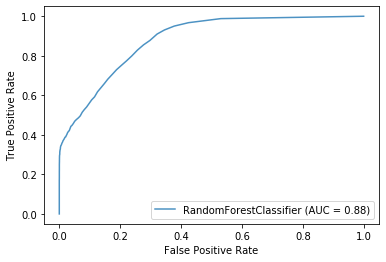

In [35]:
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

-> The AUC is same as the previous model but let us also check our model with our private data which our leaderboard has been decided

In [40]:
x = df.drop(columns=["is_promoted"],axis=1)

In [42]:
y= df["is_promoted"]

In [51]:
rfc1 = RandomForestClassifier()
rfc1.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

-> Doing same operations for the test data as well

In [44]:
test = pd.read_csv("HR analytics_test.csv")

In [45]:
test.head()

,employee_id,KPIs_met >80%,age,avg_training_score,awards_won?,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,...,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,length_of_service,no_of_trainings,previous_year_rating
0,74430,0,31,51,0,0,0,1,0,0,...,0,0,1,0,0,1,0,5,1,3
1,72255,0,31,47,0,0,0,0,0,0,...,1,0,1,0,0,0,1,4,1,1
2,38562,0,31,65,0,0,0,0,0,0,...,0,0,1,0,0,1,0,9,3,2
3,64486,0,30,61,0,0,1,0,0,0,...,0,0,1,0,0,0,1,7,1,4
4,46232,0,36,68,0,0,0,0,0,0,...,0,0,1,0,0,0,1,2,1,3


In [47]:
test["score"] = test[["awards_won?","KPIs_met >80%","previous_year_rating","avg_training_score"]].sum(axis=1)

In [52]:
pre = rfc1.predict(test)

In [54]:
test["is_promoted"] = pre

In [56]:
sub = test[["employee_id","is_promoted"]]

In [57]:
sub.head()

,employee_id,is_promoted
0,74430,0
1,72255,0
2,38562,0
3,64486,0
4,46232,0


In [58]:
sub.to_csv('C:\\Users\\Dell\\Downloads\\submission7.csv') 

-> with the new model the f1 score is - 0.476277372262774 which is good compared to previous model the f1 score for the test data is - 0.459259259259259

# Result & Suggestions

1) The final model f1 score is 0.476277372262774

2) The HR Team should more focus on the people having good average training score and kpi > 80

3) Previous year ratings aslo plays a major role and age does not help in getting promoted

4) Giving score as an extra variable for each employee by using some important variables helps in imporving the f1 score of the model , Feature Engineering helped better in predicting the employees class.